**Automatidata is trying to develop a regression model that helps estimate taxi fares before the ride, based on data that TLC has gathered.**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns

In [9]:
df=pd.read_csv('/content/drive/MyDrive/2017_Yellow_Taxi_Trip_Data.csv')

In [10]:
df.size

408582

In [11]:
# Convert data columns to datetime
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

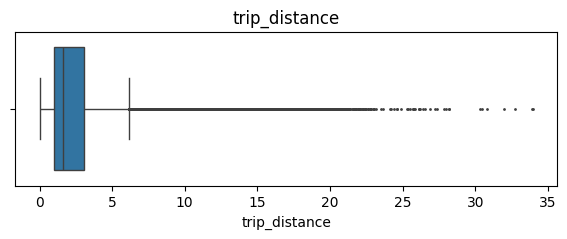

In [12]:
# Create box plot of trip_distance
plt.figure(figsize=(7,2))
plt.title('trip_distance')
sns.boxplot(data=None, x=df['trip_distance'], fliersize=1);

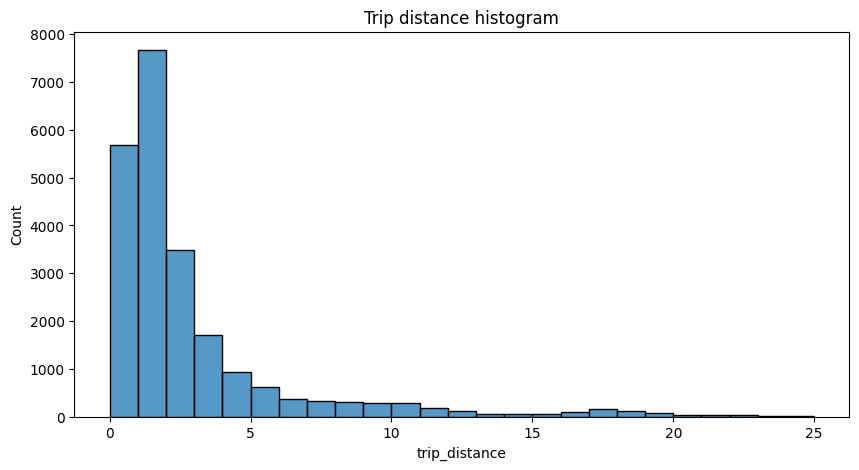

In [13]:
# Create histogram of trip_distance
plt.figure(figsize=(10,5))
sns.histplot(df['trip_distance'], bins=range(0,26,1))
plt.title('Trip distance histogram');

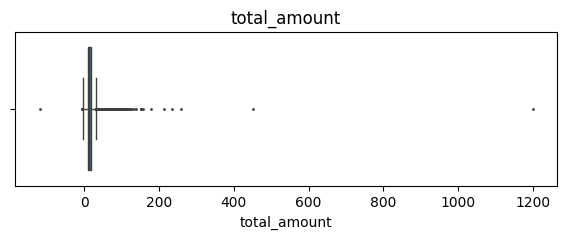

In [14]:
# Create box plot of total_amount
plt.figure(figsize=(7,2))
plt.title('total_amount')
sns.boxplot(x=df['total_amount'], fliersize=1);

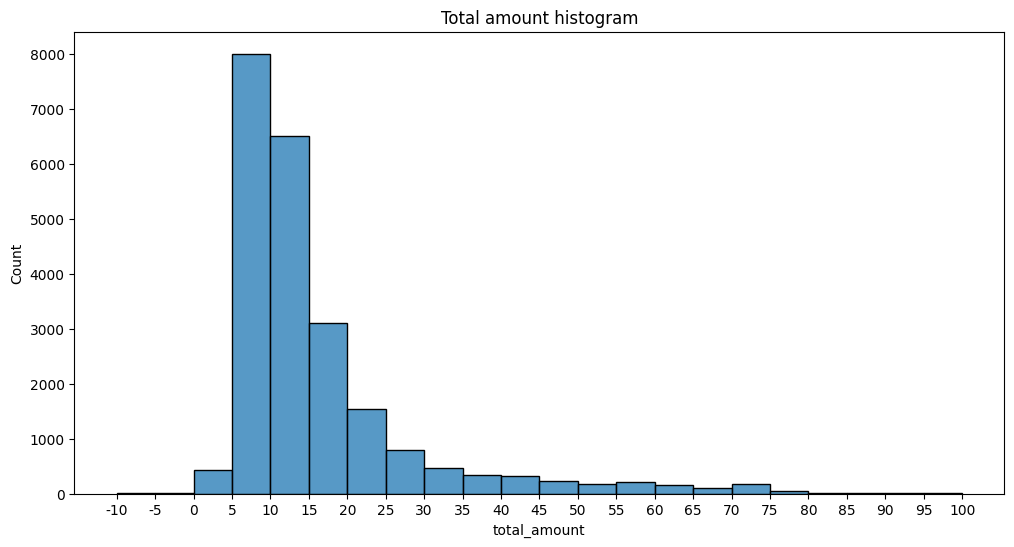

In [15]:
# Create histogram of total_amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df['total_amount'], bins=range(-10,101,5))
ax.set_xticks(range(-10,101,5))
ax.set_xticklabels(range(-10,101,5))
plt.title('Total amount histogram');

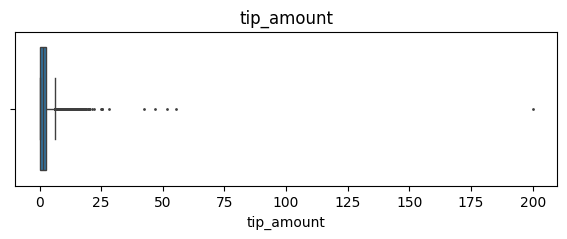

In [16]:
# Create box plot of tip_amount
plt.figure(figsize=(7,2))
plt.title('tip_amount')
sns.boxplot(x=df['tip_amount'], fliersize=1);

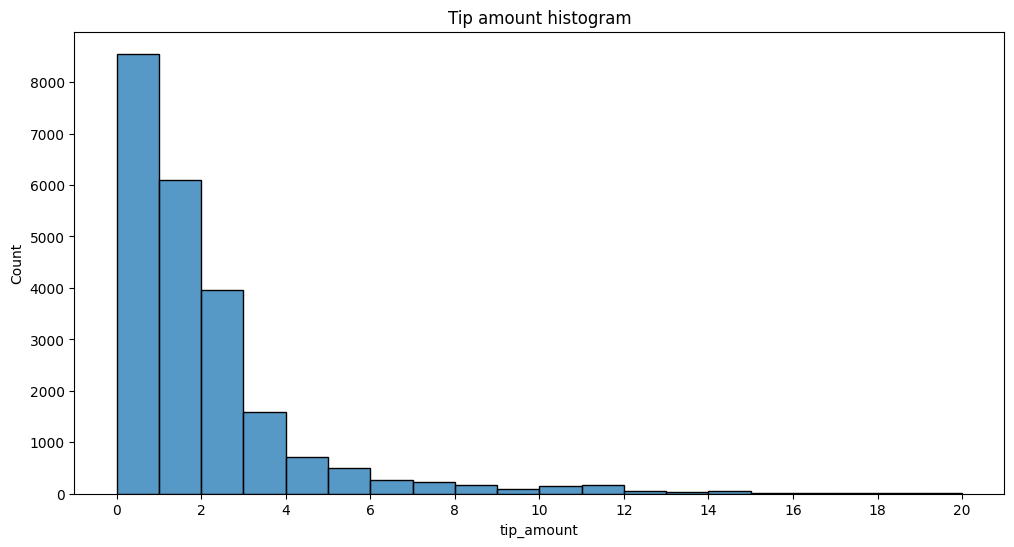

In [17]:
# Create histogram of tip_amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df['tip_amount'], bins=range(0,21,1))
ax.set_xticks(range(0,21,2))
ax.set_xticklabels(range(0,21,2))
plt.title('Tip amount histogram');

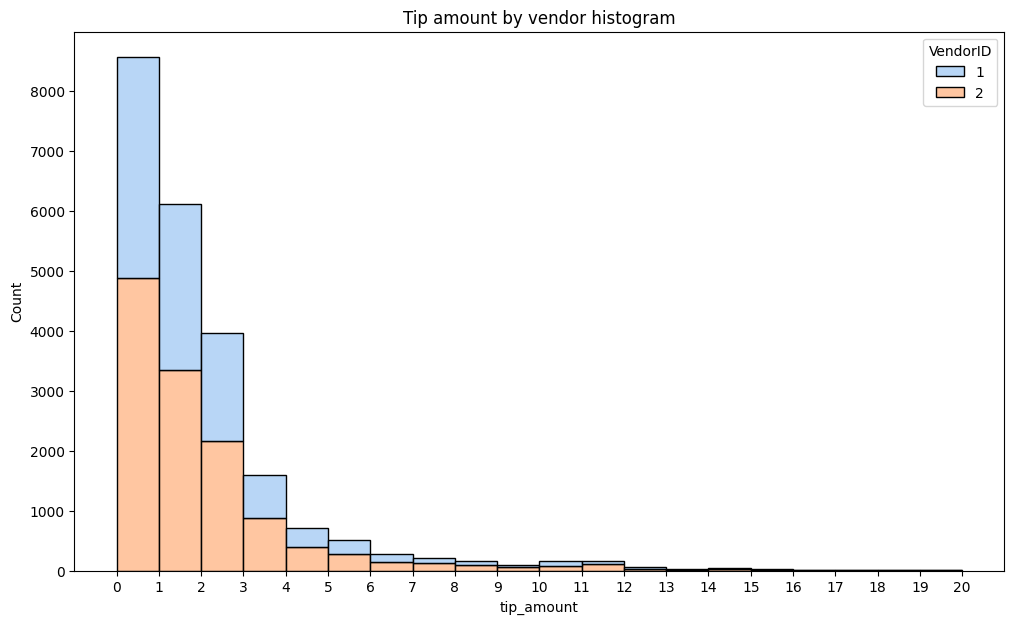

In [18]:
# Create histogram of tip_amount by vendor
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df, x='tip_amount', bins=range(0,21,1),
                  hue='VendorID',
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by vendor histogram');

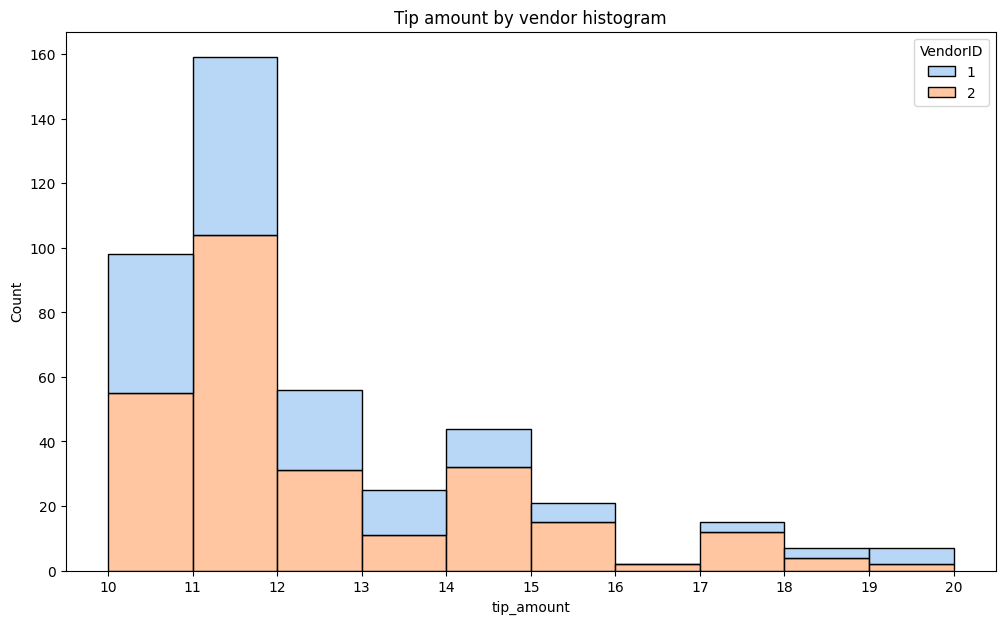

In [19]:
# Create histogram of tip_amount by vendor for tips > $10
tips_over_ten = df[df['tip_amount'] > 10]
plt.figure(figsize=(12,7))
ax = sns.histplot(data=tips_over_ten, x='tip_amount', bins=range(10,21,1),
                  hue='VendorID',
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('Tip amount by vendor histogram');

In [20]:
df['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

In [22]:
# # Calculate mean tips by passenger_count
# mean_tips_by_passenger_count = df.groupby(['passenger_count']).mean()[['tip_amount']]
# mean_tips_by_passenger_count

TypeError: Could not convert NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN to numeric

In [ ]:
# # Create bar plot for mean tips by passenger count
# data = mean_tips_by_passenger_count.tail(-1)
# pal = sns.color_palette("Greens_d", len(data))
# rank = data['tip_amount'].argsort().argsort()
# plt.figure(figsize=(12,7))
# ax = sns.barplot(x=data.index,
#             y=data['tip_amount'],
#             palette=np.array(pal[::-1])[rank])
# ax.axhline(df['tip_amount'].mean(), ls='--', color='red', label='global mean')
# ax.legend()
# plt.title('Mean tip amount by passenger count', fontsize=16);

In [24]:
# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

In [25]:
monthly_rides = df['month'].value_counts()
monthly_rides

month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

In [26]:
# Reorder the monthly ride list so months go in order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

<ipython-input-27-7d2fefed877f>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(month_order)


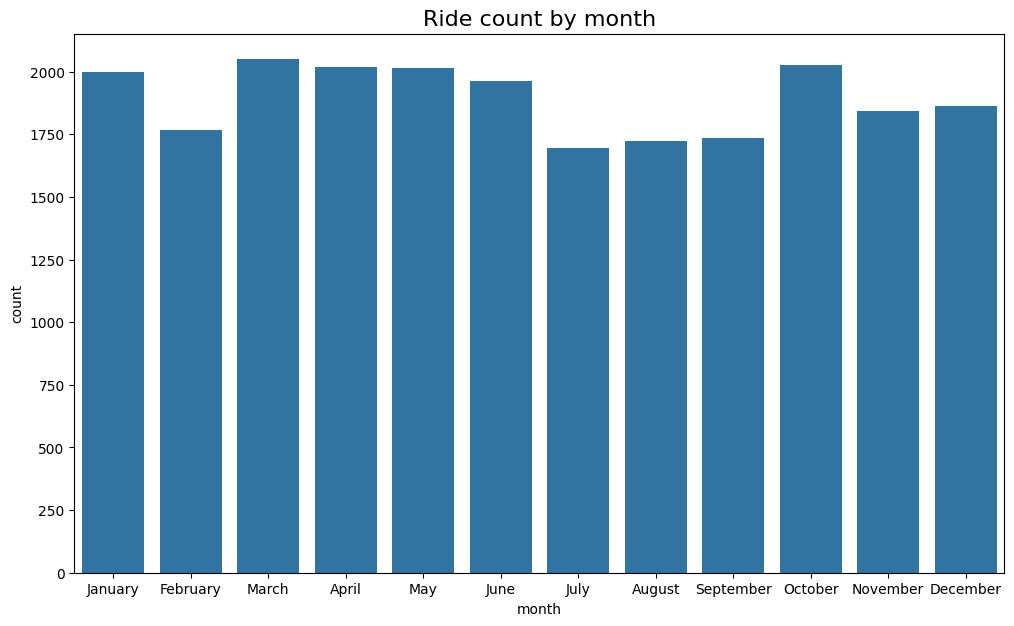

In [27]:
# Create a bar plot of total rides per month
plt.figure(figsize=(12,7))
ax = sns.barplot(x=monthly_rides.index, y=monthly_rides)
ax.set_xticklabels(month_order)
plt.title('Ride count by month', fontsize=16);

In [28]:
daily_rides = df['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index=day_order)
daily_rides

day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: count, dtype: int64

<ipython-input-29-fd95b2d5ee50>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(day_order)


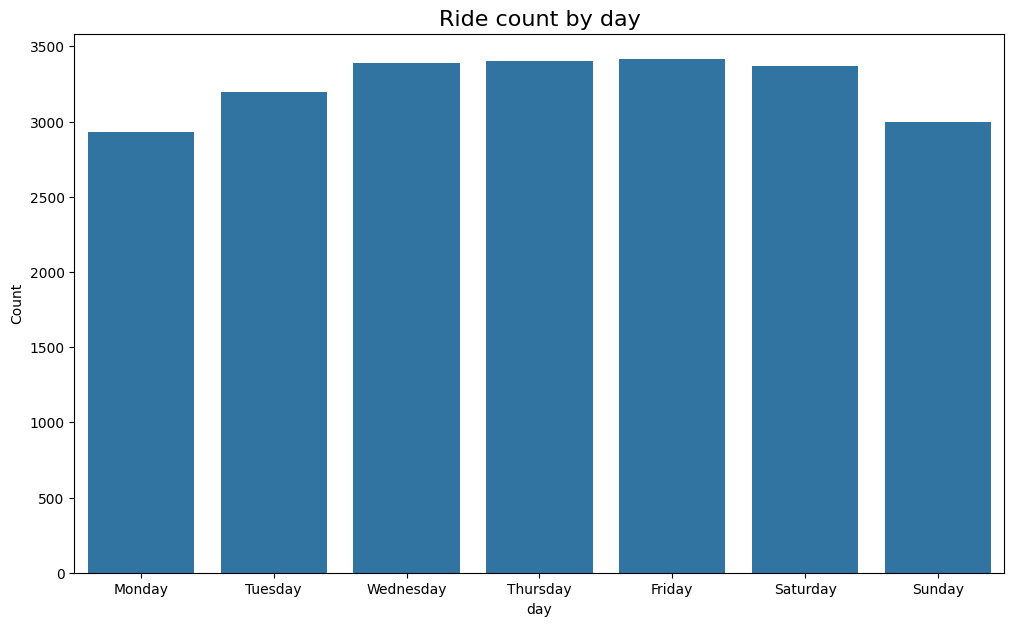

In [29]:
# Create bar plot for ride count by day
plt.figure(figsize=(12,7))
ax = sns.barplot(x=daily_rides.index, y=daily_rides)
ax.set_xticklabels(day_order)
ax.set_ylabel('Count')
plt.title('Ride count by day', fontsize=16);

In [30]:
# # Repeat the process, this time for total revenue by day
# day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# total_amount_day = df.groupby('day').sum()[['total_amount']]
# total_amount_day = total_amount_day.reindex(index=day_order)
# total_amount_day

TypeError: datetime64 type does not support sum operations

In [ ]:
# # Create bar plot of total revenue by day
# plt.figure(figsize=(12,7))
# ax = sns.barplot(x=total_amount_day.index, y=total_amount_day['total_amount'])
# ax.set_xticklabels(day_order)
# ax.set_ylabel('Revenue (USD)')
# plt.title('Total revenue by day', fontsize=16);

In [31]:
# # Repeat the process, this time for total revenue by month
# total_amount_month = df.groupby('month').sum()[['total_amount']]
# total_amount_month = total_amount_month.reindex(index=month_order)
# total_amount_month

TypeError: datetime64 type does not support sum operations

In [ ]:
# # Create a bar plot of total revenue by month
# plt.figure(figsize=(12,7))
# ax = sns.barplot(x=total_amount_month.index, y=total_amount_month['total_amount'])
# plt.title('Total revenue by month', fontsize=16);

216

In [33]:
# # Calculate the mean trip distance for each drop-off location
# distance_by_dropoff = df.groupby('DOLocationID').mean()[['trip_distance']]

# # Sort the results in descending order by mean trip distance
# distance_by_dropoff = distance_by_dropoff.sort_values(by='trip_distance')
# distance_by_dropoff

TypeError: Could not convert NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN to numeric

In [ ]:
# # Create a bar plot of mean trip distances by drop-off location in ascending order by distance
# plt.figure(figsize=(14,6))
# ax = sns.barplot(x=distance_by_dropoff.index,
#                  y=distance_by_dropoff['trip_distance'],
#                  order=distance_by_dropoff.index)
# ax.set_xticklabels([])
# ax.set_xticks([])
# plt.title('Mean trip distance by drop-off location', fontsize=16);

 I have learned the highest distribution of trip distances are below 5 miles, but there are outliers all the way out to 35 miles. There are no missing values.

My other questions are  There are several trips that have a trip distance of "0.0." What might those trips be? Will they impact our model?

My client would likely want to know that the data includes dropoff and pickup times. We can use that information to derive a trip duration for each line of data. This would likely be something that will help the client with their model.